RAW DATA EXTRACTION,EXPLOARING AND CLEANING

In [129]:
import pandas as pd
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv"
Kdf = pd.read_csv(url)

# Saving it as a CSV file locally
Kdf.to_csv("constituents.csv", index=False)


In [130]:
Kdf.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [131]:
Kdf.tail()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
502,ZTS,Zoetis,Health Care,Pharmaceuticals,"Parsippany, New Jersey",2013-06-21,1555280,1952


In [132]:
print("Dataset Dimensions:", Kdf.shape)

Dataset Dimensions: (503, 8)


In [133]:
# Checking for missing values
missing_values =Kdf.isnull().any()
print("Missing values in each column:\n", missing_values)

# Checking the total missing values
total_missing = Kdf.isnull().sum().sum()
print("\nTotal missing values in dataset:", total_missing)


Missing values in each column:
 Symbol                   False
Security                 False
GICS Sector              False
GICS Sub-Industry        False
Headquarters Location    False
Date added               False
CIK                      False
Founded                  False
dtype: bool

Total missing values in dataset: 0


In [134]:
#SINCE THERE IS NO MISSING VALUES IN THE DATASET SO NO NEED TO HANDLE ANY MISSING VALUES


In [135]:
print("Dataset Summary:")
display(Kdf.describe(include='all'))

Dataset Summary:


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
count,503,503,503,503,503,503,5.030000e+02,503
unique,503,503,11,127,252,376,NaN,199
top,MMM,3M,Industrials,Health Care Equipment,"New York City, New York",1957-03-04,NaN,1993
freq,1,1,78,18,41,54,NaN,13
mean,NaN,NaN,NaN,NaN,NaN,NaN,8.217536e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5.665200e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.800000e+03,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.005050e+05,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,9.000750e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.175188e+06,NaN


In [136]:
print("Data Types:")
display(Kdf.dtypes)

Data Types:


,0
Symbol,object
Security,object
GICS Sector,object
GICS Sub-Industry,object
Headquarters Location,object
Date added,object
CIK,int64
Founded,object


In [137]:
Kdf.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
6,AMD,Advanced Micro Devices,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999


In [138]:
#Clearing the "Founded" column
#in some case it written like this -> 1958 (1889)
import re
def extract_year(value):
    if isinstance(value, str):
        years = re.findall(r'\d{4}', value)
        return min(map(int, years)) if years else None
    return value

Kdf['Founded'] = Kdf['Founded'].apply(extract_year)

# Save the cleaned data
Kdf.to_csv("cleaned_constituents.csv", index=False)

In [139]:
Kdf.head(10)
#Fixes "1958 (1889)" → "1889" (earliest year)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,1888
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
6,AMD,Advanced Micro Devices,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999


BINNING AND DECENTRALIZATION

In [140]:
#Equal Frequency Binning
Kdf1 = pd.qcut(Kdf['CIK'], q=4)
pd.value_counts(Kdf1)

<ipython-input-140-d998a3ecd0c8>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(Kdf1)


,count
CIK,
"(1799.999, 100505.0]",126
"(100505.0, 900075.0]",126
"(1175188.0, 2005951.0]",126
"(900075.0, 1175188.0]",125


In [141]:
# Equal-Width Binning
Kdf2 = pd.cut(Kdf['CIK'], bins=5)
pd.value_counts(Kdf2)

<ipython-input-141-411204c701b8>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(Kdf2)


,count
CIK,
"(803460.4, 1204290.6]",183
"(-204.151, 402630.2]",157
"(1204290.6, 1605120.8]",83
"(1605120.8, 2005951.0]",41
"(402630.2, 803460.4]",39


In [142]:
yr = [1800,1900,2000,2100]
Labels = ['Very Old', 'Old', 'New']

In [143]:
Kdf3 = pd.cut(Kdf['Founded'], bins=yr, labels=Labels)
pd.value_counts(Kdf3)

<ipython-input-143-37ae57bb4860>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(Kdf3)


,count
Founded,
Old,365
Very Old,91
New,43


STATISTICAL ANALYSIS

In [144]:
import numpy as np
def summary_stats(x):
    """
    Function to compute mean, median,mode ,standard deviation, min, max, Q1, and Q3.
    """
    return {
        'Mean': np.nanmean(x),
        'Median': np.nanmedian(x),
        'Mode': pd.Series(x).mode().tolist(),  # Mode computation
        'SD': np.nanstd(x, ddof=1),
        'Min': np.nanmin(x),
        'Max': np.nanmax(x),
        'Q1': np.nanquantile(x, 0.25),
        'Q3': np.nanquantile(x, 0.75)
    }

ans = summary_stats(Kdf['Founded'])
print(ans)

{'Mean': 1948.3777335984096, 'Median': 1966.0, 'Mode': [1993], 'SD': 50.13802126656474, 'Min': 1784, 'Max': 2024, 'Q1': 1912.0, 'Q3': 1989.0}


In [145]:
import pandas as pd
import scipy.stats as stats

# Compute skewness and kurtosis for numerical columns
numeric_cols = Kdf.select_dtypes(include=['number'])  # Selecting only numeric columns

skewness = numeric_cols.skew()
kurtosis = numeric_cols.kurtosis()

# Print the results
print("\nSkewness :\n", skewness)
print("\nKurtosis :\n", kurtosis)



Skewness :
 CIK       -0.093017
Founded   -0.815546
dtype: float64

Kurtosis :
 CIK       -1.108123
Founded   -0.008995
dtype: float64


In [146]:
K_cols = Kdf.select_dtypes(include=['number']).iloc[:, :8]
K_cols

,CIK,Founded
0,66740,1902
1,91142,1916
2,1800,1888
3,1551152,1888
4,1467373,1989
...,...,...
498,1524472,2011
499,1041061,1997
500,877212,1969
501,1136869,1927


In [164]:
numeric_cols = Kdf.select_dtypes(include=['number'])

# Compute Quartiles
Q1 = numeric_cols.quantile(0.25)
Q2 = numeric_cols.quantile(0.50)  # Median
Q3 = numeric_cols.quantile(0.75)
deciles = {f"D{i}": numeric_cols.quantile(i/10) for i in range(1, 10)}

# Compute Interquartile Range (IQR)
IQR = Q3 - Q1

# Printing results
print(" Quartiles:")
print(f"Q1 (25th percentile):\n{Q1}\n")
print(f"Q2 (50th percentile - Median):\n{Q2}\n")
print(f"Q3 (75th percentile):\n{Q3}\n")




 Quartiles:
Q1 (25th percentile):
CIK        100505.0
Founded      1912.0
Name: 0.25, dtype: float64

Q2 (50th percentile - Median):
CIK        900075.0
Founded      1966.0
Name: 0.5, dtype: float64

Q3 (75th percentile):
CIK        1175188.0
Founded       1989.0
Name: 0.75, dtype: float64



In [148]:
print(" Deciles:")
for key, value in deciles.items():
    print(f"{key}:\n{value}\n")



 Deciles:
D1:
CIK    36573.0
Name: 0.1, dtype: float64

D2:
CIK    77686.8
Name: 0.2, dtype: float64

D3:
CIK    320190.6
Name: 0.3, dtype: float64

D4:
CIK    814987.0
Name: 0.4, dtype: float64

D5:
CIK    900075.0
Name: 0.5, dtype: float64

D6:
CIK    1035302.2
Name: 0.6, dtype: float64

D7:
CIK    1110298.6
Name: 0.7, dtype: float64

D8:
CIK    1339631.4
Name: 0.8, dtype: float64

D9:
CIK    1570500.8
Name: 0.9, dtype: float64



In [149]:
print(" Interquartile Range (IQR):")
print(IQR)

 Interquartile Range (IQR):
CIK    1074683.0
dtype: float64


In [150]:
import pandas as pd
import numpy as np
from scipy import stats

numeric_cols = Kdf.select_dtypes(include=['number'])

# IQR Method for Outlier Detection
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers_iqr = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound))

# Z-score
z_scores = np.abs(stats.zscore(numeric_cols))  # Compute Z-scores
outliers_z = z_scores > 3  # Mark values beyond Z-score of 3 as outliers

# Print results
print("Outliers using IQR Method:")
print(numeric_cols[outliers_iqr].dropna(how='all'))

print("\nOutliers using Z-score Method:")
print(numeric_cols[outliers_z].dropna(how='all'))


Outliers using IQR Method:
     CIK  Founded
58   NaN   1784.0
325  NaN   1786.0
426  NaN   1792.0

Outliers using Z-score Method:
     CIK  Founded
58   NaN   1784.0
325  NaN   1786.0
426  NaN   1792.0



 Top 10 Headquarters Locations with High CIK:
Headquarters Location
Dublin, Ireland             2005951
Chesterfield, Missouri      1996862
Cambridge, Massachusetts    1996810
Waltham, Massachusetts      1967680
Saint Paul, Minnesota       1964738
Skillman, New Jersey        1944048
Chicago, Illinois           1932393
Baltimore, Maryland         1868275
Houston, Texas              1841666
Pittsburgh, Pennsylvania    1792044
Name: CIK, dtype: int64


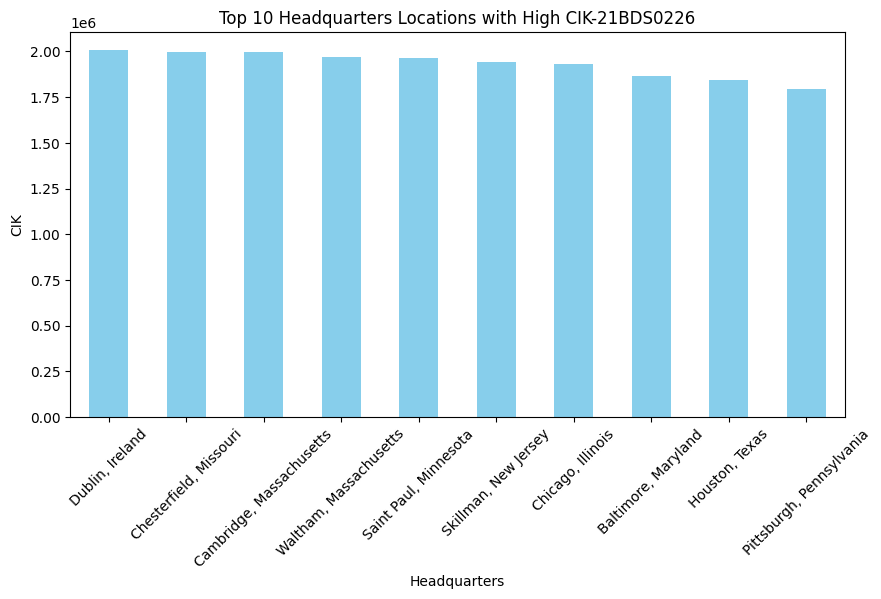

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1) Top 10 Headquarters Locations with High CIK
top_hq = Kdf.groupby("Headquarters Location")["CIK"].max().sort_values(ascending=False).head(10)
print("\n Top 10 Headquarters Locations with High CIK:")
print(top_hq)

# Plot Top 10 Headquarters with High CIK
plt.figure(figsize=(10,5))
top_hq.plot(kind='bar', color='skyblue')
plt.xlabel("Headquarters")
plt.ylabel("CIK")
plt.title("Top 10 Headquarters Locations with High CIK-21BDS0226")
plt.xticks(rotation=45)
plt.show()



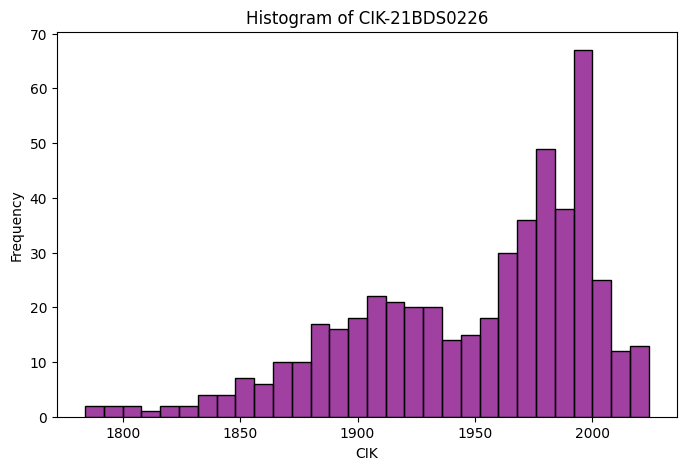

In [161]:
# 2) Histogram (Distribution of CIK)
plt.figure(figsize=(8,5))
sns.histplot(Kdf["Founded"], bins=30, kde=False, color='purple')
plt.xlabel("CIK")
plt.ylabel("Frequency")
plt.title("Histogram of CIK-21BDS0226")
plt.show()




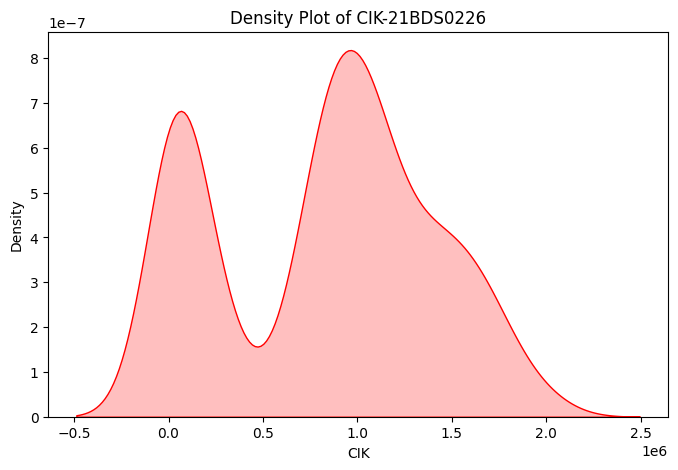

In [162]:
# 3) Density Plot (KDE)
plt.figure(figsize=(8,5))
sns.kdeplot(Kdf["CIK"], color='red', fill=True)
plt.xlabel("CIK")
plt.ylabel("Density")
plt.title("Density Plot of CIK-21BDS0226")
plt.show()



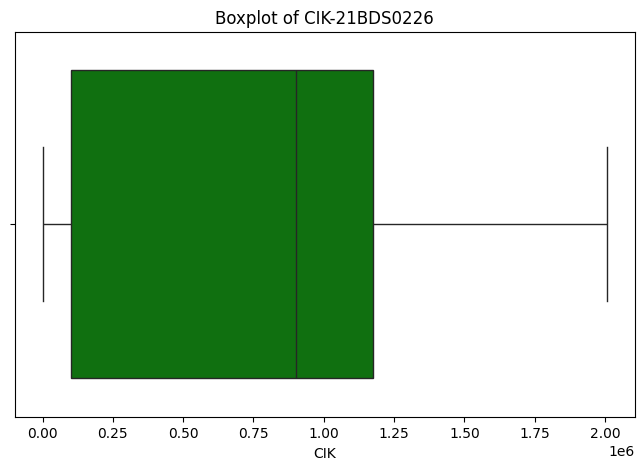

In [163]:
# 4) Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=Kdf["CIK"], color='green')
plt.xlabel("CIK")
plt.title("Boxplot of CIK-21BDS0226")
plt.show()

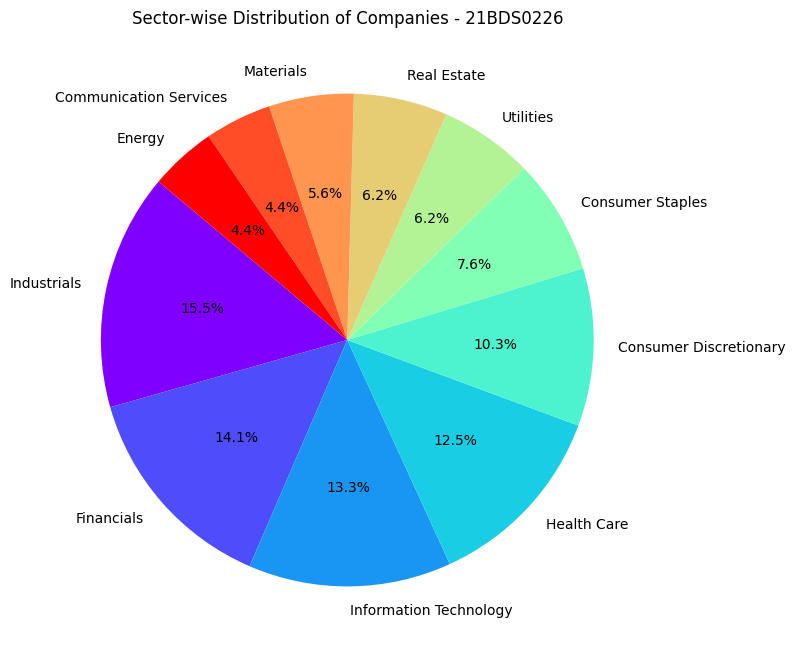

In [155]:

sector_counts = Kdf["GICS Sector"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index,
        autopct='%1.1f%%', colors = plt.cm.rainbow(np.linspace(0, 1, len(sector_counts))),
        startangle=140)


plt.title("Sector-wise Distribution of Companies - 21BDS0226")

plt.show()


In [156]:
#Relationship between two features
np.corrcoef(Kdf["Founded"], Kdf["CIK"])

array([[1.       , 0.4130972],
       [0.4130972, 1.       ]])

BIVARIATE ANALYSIS

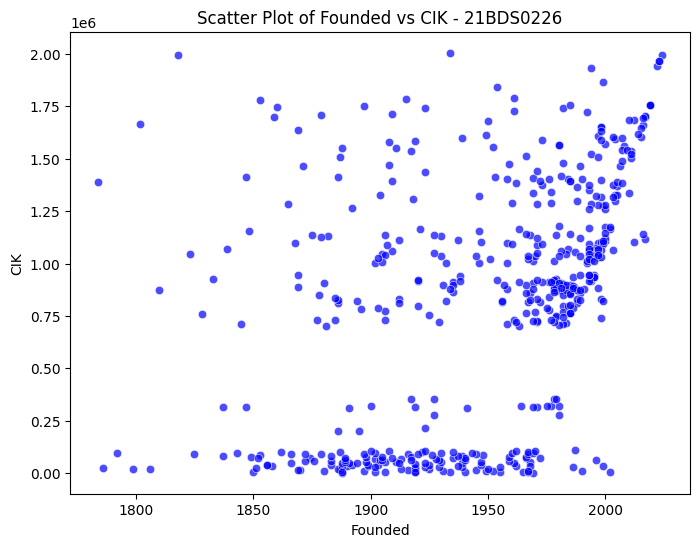

In [157]:

import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = Kdf.select_dtypes(include=['number'])

# 1) Scatter Plot (Bivariate Analysis)
plt.figure(figsize=(8,6))
sns.scatterplot(x=Kdf["Founded"], y=Kdf["CIK"], alpha=0.7, color='blue')
plt.xlabel("Founded")
plt.ylabel("CIK")
plt.title("Scatter Plot of Founded vs CIK - 21BDS0226")
plt.show()



<ipython-input-158-e89e67fff7c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Kdf["GICS Sector"].value_counts().index, y=Kdf["GICS Sector"].value_counts().values, palette='viridis')


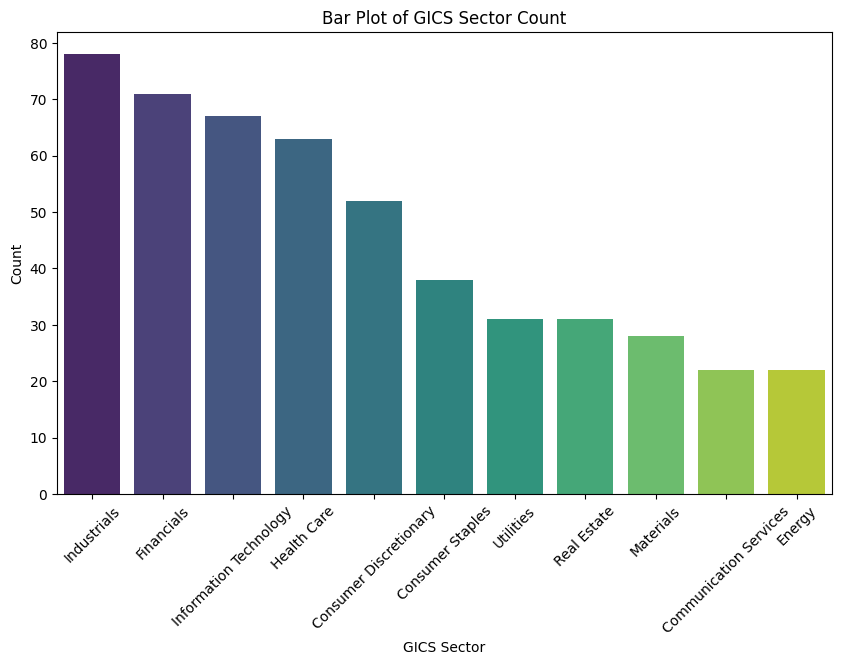

In [158]:
#2) Bar Plot (Bivariate Analysis)
plt.figure(figsize=(10,6))
sns.barplot(x=Kdf["GICS Sector"].value_counts().index, y=Kdf["GICS Sector"].value_counts().values, palette='viridis')
plt.xlabel("GICS Sector")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Bar Plot of GICS Sector Count")
plt.show()



MULTIVARIATE ANALYSIS

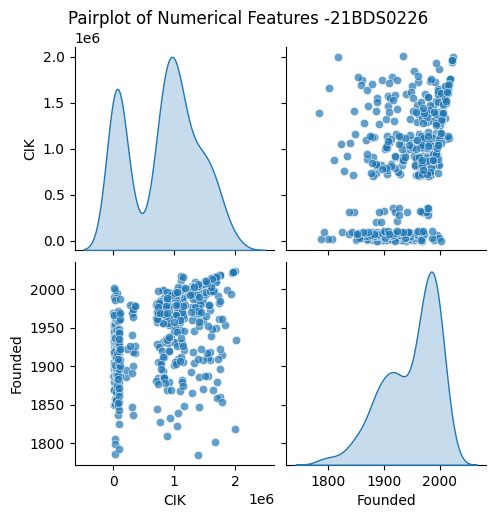

In [159]:
# 3) Pairplot (Multivariate Analysis)
sns.pairplot(numeric_cols, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle("Pairplot of Numerical Features -21BDS0226", y=1.02)
plt.show()



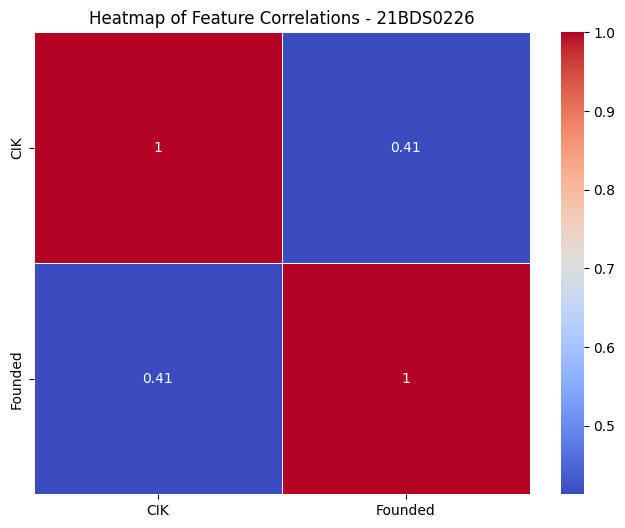

In [160]:
# 4) Heatmap (Multivariate Analysis)
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Feature Correlations - 21BDS0226")
plt.show()